In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import os
import pandas
from dust_extinction.averages import (GCC09_MWAvg, RL85_MWGC, I05_MWAvg, CT06_MWLoc, CT06_MWGC,F11_MWGC)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker

In [21]:
models = [GCC09_MWAvg]
x = np.arange(0.325,1,0.0001)/u.micron 
#the start and stop values are the wavelengths covered by the colour passbands you want to predict the spectral type using  
#see filter sheet in teams for the lower and upper limits of each band
for cmodel in models:
   ext_model = cmodel()
   indxs, = np.where(np.logical_and(
      x.value >= ext_model.x_range[0],
      x.value <= ext_model.x_range[1]))
yval = ext_model(x[indxs])

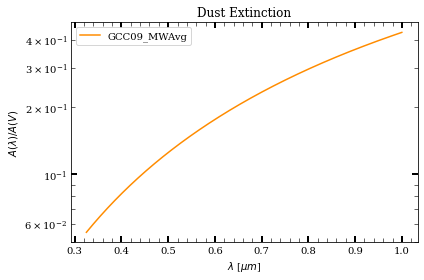

In [27]:
plt.rcParams["font.family"] = "serif"
models =[GCC09_MWAvg]
fig, ax1 = plt.subplots()

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='major', direction='in', length=6, width=2, colors='black', top=True, right=True)
ax1.tick_params(which='minor', direction='in', length=4, top=True, right=True)

ax1.plot(x[indxs], yval, label=ext_model.__class__.__name__, color='darkorange')
yvals=yval
ax1.set_yscale("log")
ax1.set_xlabel(r'$\lambda$ [$\mu m$]')
ax1.set_ylabel(r'$A(\lambda)/A(V)$')
ax1.set_title('Dust Extinction')
fig.tight_layout()
ax1.legend()
plt.savefig('dust_extinction.png')
plt.show()